# **Elliptic++ Transactions Dataset**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---



## [SETUP] Import libraries and csv files 

Download dataset from: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.graph_objs as go 
import plotly.offline as py 
import math

# !pip install -U ipython 
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.base import clone 

import xgboost as xgb

## Transactions Dataset Overview


---

This section loads the 3 csv files (txs_features, txs_classes, txs_edgelist) and provides a quick overview of the dataset structure and features.

Load saved transactions dataset csv files:

In [10]:
print("\nTransaction features: \n")
df_txs_features = pd.read_csv("txs_features.csv")
df_txs_features

print("\nTransaction classes: \n")
df_txs_classes = pd.read_csv("txs_classes (1).csv")
df_txs_classes

print("\nTransaction-Transaction edgelist: \n")
df_txs_edgelist = pd.read_csv("txs_edgelist.csv")
df_txs_edgelist

## added this line to add class to df_txs_features
df_txs_features = df_txs_features.merge(df_txs_classes[['txId', 'class']], on='txId', how='left')


Transaction features: 


Transaction classes: 


Transaction-Transaction edgelist: 



class
3    157205
2     42019
1      4545
Name: count, dtype: int64

Data structure for an example transaction (txId = 272145560):

In [12]:
print("\ntxs_features.csv for txId = 272145560\n")
df_txs_features[df_txs_features['txId']==272145560]

print("\ntxs_classes.csv for txId = 272145560\n")
df_txs_classes[df_txs_classes['txId']==272145560]

print("\ntxs_edgelist.csv for txId = 272145560\n")
df_txs_edgelist[(df_txs_edgelist['txId1']==272145560) | (df_txs_edgelist['txId2']==272145560)]


txs_features.csv for txId = 272145560


txs_classes.csv for txId = 272145560


txs_edgelist.csv for txId = 272145560



,txId1,txId2
123072,272145560,296926618
123272,272145560,272145556
125873,299475624,272145560



Transaction features --- 94 local features, 72 aggregate features, 17 augmented features:


In [14]:
list(df_txs_features.columns)

['txId',
 'Time step',
 'Local_feature_1',
 'Local_feature_2',
 'Local_feature_3',
 'Local_feature_4',
 'Local_feature_5',
 'Local_feature_6',
 'Local_feature_7',
 'Local_feature_8',
 'Local_feature_9',
 'Local_feature_10',
 'Local_feature_11',
 'Local_feature_12',
 'Local_feature_13',
 'Local_feature_14',
 'Local_feature_15',
 'Local_feature_16',
 'Local_feature_17',
 'Local_feature_18',
 'Local_feature_19',
 'Local_feature_20',
 'Local_feature_21',
 'Local_feature_22',
 'Local_feature_23',
 'Local_feature_24',
 'Local_feature_25',
 'Local_feature_26',
 'Local_feature_27',
 'Local_feature_28',
 'Local_feature_29',
 'Local_feature_30',
 'Local_feature_31',
 'Local_feature_32',
 'Local_feature_33',
 'Local_feature_34',
 'Local_feature_35',
 'Local_feature_36',
 'Local_feature_37',
 'Local_feature_38',
 'Local_feature_39',
 'Local_feature_40',
 'Local_feature_41',
 'Local_feature_42',
 'Local_feature_43',
 'Local_feature_44',
 'Local_feature_45',
 'Local_feature_46',
 'Local_feature_47',

## Machine Learning Model Classification


---

This section does data preprocessing, creates the training and testing sets, and runs the Logistic Regression, Random Forest, Multilayer Perceptrons, and XGBoost models as well as the ensembles on the dataset.


Drop transactions without augmented feature values (0.5% not de-anonymized):

In [17]:
df_txs_features = df_txs_features.dropna()
df_txs_features

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


Data transformation on the augmented features using MinMaxScaler:

In [19]:
for column in df_txs_features.columns[168:184]: 
    feature = np.array(df_txs_features[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    df_txs_features[column] = feature_scaled.reshape(1,-1)[0]

In [20]:
# remove 'unknown' transactions
data = df_txs_features.loc[(df_txs_features['class'] != 3), 'txId']
df_txs_features_selected = df_txs_features.loc[df_txs_features['txId'].isin(data)]
df_txs_features_selected

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,7.022548e-04,2.723834e-04,8.778200e-05,8.171503e-04,6.113009e-04,7.142783e-04,0.001552,1.552291e-03,8.171446e-04,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,7.480472e-02,7.480472e-02,7.480472e-02,7.480472e-02,6.466160e-11,3.647866e-03,0.000022,1.451405e-07,7.480473e-02,2
11,293323,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,...,3.577994e-06,3.578006e-06,3.579195e-06,3.575573e-06,4.715323e-07,3.511341e-06,0.000007,6.780735e-06,3.569892e-06,2
22,1494462,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,...,8.766174e-07,8.766298e-07,8.778192e-07,8.741973e-07,1.442451e-06,6.094506e-07,0.000002,1.632382e-06,8.597370e-07,2
25,1582950,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,...,4.198289e-05,4.198290e-05,4.198409e-05,4.198047e-05,2.302948e-05,3.817869e-05,0.000080,7.973672e-05,4.197479e-05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202762,194334585,49,-0.039416,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.026985,...,1.858864e-03,1.858864e-03,1.858865e-03,1.858862e-03,1.992449e-05,1.868443e-03,0.003531,3.531138e-03,1.858833e-03,2
202763,194334621,49,-0.050308,-0.112834,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.038129,...,1.707287e-03,1.707287e-03,1.707288e-03,1.707285e-03,4.973969e-06,1.718449e-03,0.003243,3.243191e-03,1.707255e-03,2
202764,194335206,49,-0.154605,-0.116753,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.144840,...,2.557972e-04,2.557972e-04,2.557984e-04,2.557948e-04,1.933202e-04,2.232165e-04,0.000486,4.858661e-04,2.557661e-04,2
202765,194335216,49,0.708000,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.737731,...,1.226060e-02,1.226060e-02,1.226060e-02,1.226060e-02,5.065905e-05,1.233830e-02,0.023291,2.329083e-02,1.226057e-02,2


Split the data into training and testing sets with respect to time steps.

**Training set**: Time steps 1 to 34

**Testing set**: Time steps 35 to 49

In [22]:
# Goal: binary classification of 0,1
# 0: licit, 1: illicit

X_data = df_txs_features_selected.loc[(df_txs_features_selected['Time step'] < 35) & (df_txs_features_selected['class'] != 3), 'txId']
X_training_timesteps = df_txs_features_selected.loc[df_txs_features_selected['txId'].isin(X_data)]
X_train = X_training_timesteps.drop(columns=['txId', 'class', 'Time step'])

X_data_test = df_txs_features_selected.loc[(df_txs_features_selected['Time step'] >= 35) & (df_txs_features_selected['class'] != 3), 'txId']
X_testing_timesteps = df_txs_features_selected.loc[df_txs_features_selected['txId'].isin(X_data_test)]
X_test = X_testing_timesteps.drop(columns=['txId', 'class', 'Time step'])

y_training_timesteps = X_training_timesteps[['class']]
y_training_timesteps = y_training_timesteps['class'].apply(lambda x: 0 if x == 2 else 1 ) # change illicit (class-2) to '0' for classification
y_train = y_training_timesteps

y_testing_timesteps = X_testing_timesteps[['class']]
y_testing_timesteps = y_testing_timesteps['class'].apply(lambda x: 0 if x == 2 else 1 ) # change illicit (class-2) to '0' for classification
y_test = y_testing_timesteps

Run classifiers:

Note: Only showing RF since it had the best performance

In [24]:
# RANDOM FOREST (RF)
cRF = RandomForestClassifier(n_estimators=50).fit(X_train.values,y_train.values)
y_preds_RF = cRF.predict(X_test.values)
prec,rec,f1,num = precision_recall_fscore_support(y_test.values, y_preds_RF)

print("Random Forest")
print("Precision: %.3f \nRecall: %.3f \nF1 Score: %.3f"%(prec[1],rec[1],f1[1]))
micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f"%(micro_f1))

Random Forest
Precision: 0.964 
Recall: 0.725 
F1 Score: 0.828
Micro-Average F1 Score: 0.980


Random Forest
Accuracy: 0.980 
Precision: 0.969 
Recall: 0.720 
F1 Score: 0.826
Micro-Average F1 Score: 0.980


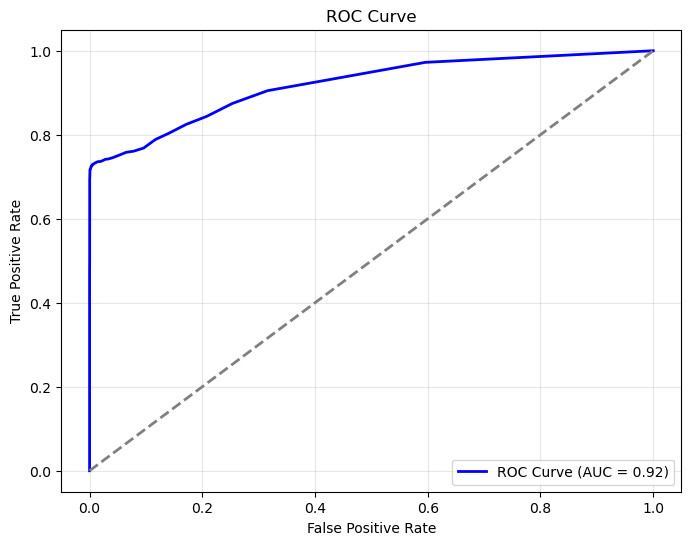

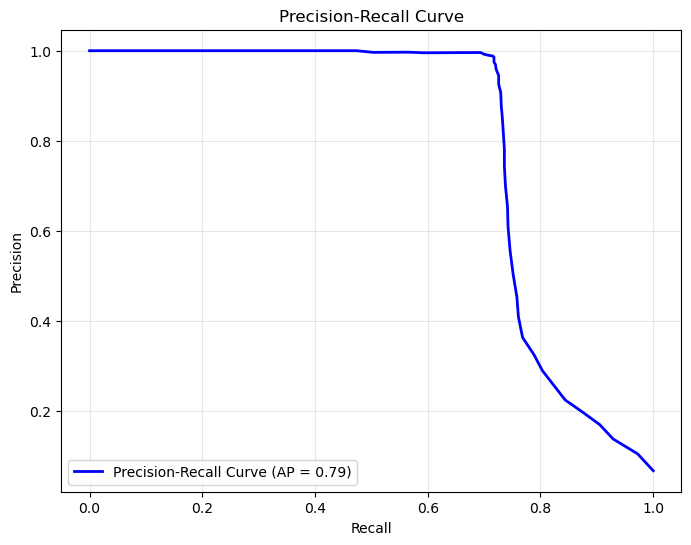

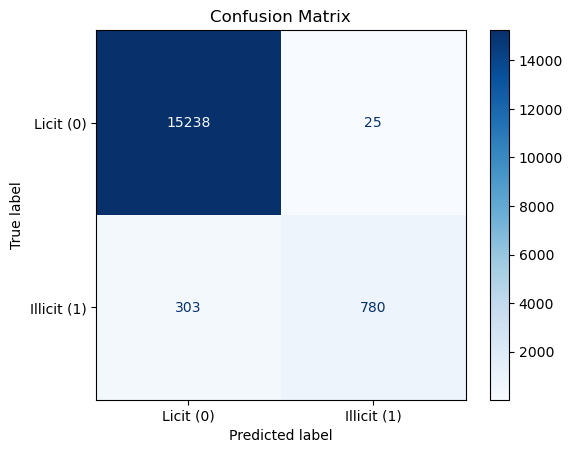

In [25]:
#Added this code block to display a confusion matrix as well as ROC and precision recall curves
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay, confusion_matrix, precision_recall_fscore_support, f1_score, accuracy_score
import matplotlib.pyplot as plt

# RANDOM FOREST (RF)
cRF = RandomForestClassifier(n_estimators=50).fit(X_train.values, y_train.values)
y_preds_RF = cRF.predict(X_test.values)
y_pred_probs_RF = cRF.predict_proba(X_test.values)[:, 1]  # Get probabilities for the positive class

# Calculate Precision, Recall, F1 Score, and Accuracy
prec, rec, f1, num = precision_recall_fscore_support(y_test.values, y_preds_RF)
accuracy = accuracy_score(y_test, y_preds_RF)

# Print metrics
print("Random Forest")
print("Accuracy: %.3f \nPrecision: %.3f \nRecall: %.3f \nF1 Score: %.3f" % (accuracy, prec[1], rec[1], f1[1]))
micro_f1 = f1_score(y_test, y_preds_RF, average='micro')
print("Micro-Average F1 Score: %.3f" % (micro_f1))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs_RF)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs_RF)
average_precision = average_precision_score(y_test, y_pred_probs_RF)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(alpha=0.3)
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_preds_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Licit (0)", "Illicit (1)"])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# **Acknowledgements**


---
---


Released by: Youssef Elmougy, Ling Liu



School of Computer Science, Georgia Institute of Technology

Contact: yelmougy3@gatech.edu


---

Github Repository: [https://www.github.com/git-disl/EllipticPlusPlus](https://www.github.com/git-disl/EllipticPlusPlus)


If you use our dataset in your work, please cite our paper:





>> Youssef Elmougy and Ling Liu. 2023. Demystifying Fraudulent Transactions and Illicit Nodes in the Bitcoin Network for Financial Forensics.

---

